In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("/home/andrea/DSSC/ML/machine_learning_data_analytics/02_linear_regression/auto2.csv", sep ="\t", decimal =",")
df_b = df.copy()
df_b.head()

,accel,potenzacv,massa
alfa-romeo 159-berlina 159-20-jtdm-136-cv-progression,9.9,136,1490
alfa-romeo 159-station 159-20-jtdm-136-cv-sw-progression,10.1,136,1540
alfa-romeo 159-station 159-20-jtdm-sw-progression,9.0,170,1540
alfa-romeo giulietta giulietta-14-turbo-105-cv,10.6,105,1280
alfa-romeo giulietta giulietta-14-turbo-120-cv,9.4,120,1280


In [3]:
#spezzo i nomi delle righe in tre parti

names = [name.split(" ") for name in list(df.index)]
df2 = pd.DataFrame.from_records(names)
df2.columns = ("marca", "modello", "modello_long")
df2.index = df.index
for i in df2.columns:
    df[i]=df2[i]


In [4]:
df.head()

,accel,potenzacv,massa,marca,modello,modello_long
alfa-romeo 159-berlina 159-20-jtdm-136-cv-progression,9.9,136,1490,alfa-romeo,159-berlina,159-20-jtdm-136-cv-progression
alfa-romeo 159-station 159-20-jtdm-136-cv-sw-progression,10.1,136,1540,alfa-romeo,159-station,159-20-jtdm-136-cv-sw-progression
alfa-romeo 159-station 159-20-jtdm-sw-progression,9.0,170,1540,alfa-romeo,159-station,159-20-jtdm-sw-progression
alfa-romeo giulietta giulietta-14-turbo-105-cv,10.6,105,1280,alfa-romeo,giulietta,giulietta-14-turbo-105-cv
alfa-romeo giulietta giulietta-14-turbo-120-cv,9.4,120,1280,alfa-romeo,giulietta,giulietta-14-turbo-120-cv


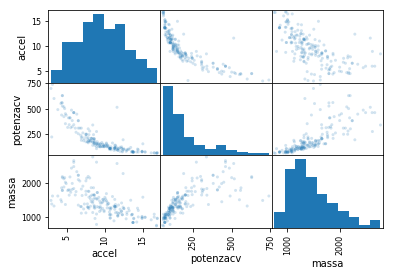

In [5]:
#analogo di pairs in R:
axes = pd.plotting.scatter_matrix(df, alpha=0.2)


In [6]:
df.describe()

,accel,potenzacv,massa
count,189.000000,189.000000,189.000000
mean,9.548148,199.534392,1462.603175
std,3.260264,145.487314,420.721867
min,2.900000,54.000000,750.000000
25%,7.500000,102.000000,1150.000000
50%,9.300000,150.000000,1365.000000
75%,11.700000,245.000000,1660.000000
max,16.900000,740.000000,2779.000000


In [7]:
import sklearn
from sklearn import linear_model

In [8]:
regr = linear_model.LinearRegression()

In [9]:
df["acc"] = df["accel"].apply(lambda x : 100/x)   #trasformo accel in un'accelerazione vera, che ora è da 0 a 100 in x sec
df["mas"] = df["massa"].apply(lambda x : x/1000)  # converto la massa in tonnellate, for the lulz

features = ["potenzacv", "mas"]
X = df.loc[:,features]
y = df["acc"]
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
print (f"accel = {regr.coef_[0]} * potenzacv  + {regr.coef_[1]} * massa + {regr.intercept_}")

accel = 0.039747170881919994 * potenzacv  + -3.468121314490123 * massa + 9.220249731364387


In [11]:
potenzacv = np.array(df["potenzacv"])
massa = np.array(df["mas"])
accel = np.array(df["accel"])

# Esperimenti di interpolazione di curve fino a grado n

In [12]:
def interpola(x,y,n):
    '''
    Dato un dataset (x,y) e un grado n, plotta i dati con tutte le curve interpolate di grado fino a n
    '''

    weights =[]
    model = []

    for order in range(1,n+1):
        weights.append(np.polyfit(x, y, order))
    #creo un modello da questi pesi

    for w in weights:
        model.append(poly1d(w))

    #disegno la curva
    xp= linspace(min(x),max(x), 666)

    predplot= []

    for m in model:
        predplot.append(m(xp))

    scatter(x, y, facecolor='None', edgecolor='k', alpha=0.3)
    for pp in predplot:
        plot(xp, pp)

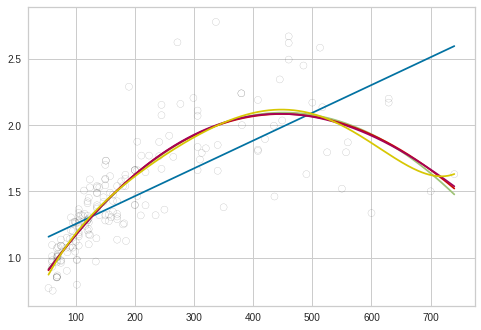

In [23]:
interpola(potenzacv, massa, 5) 


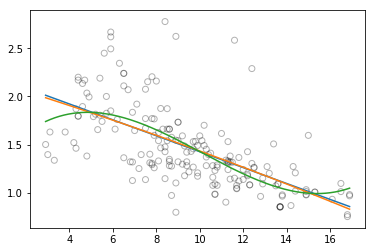

In [14]:
interpola(accel, massa, 3)

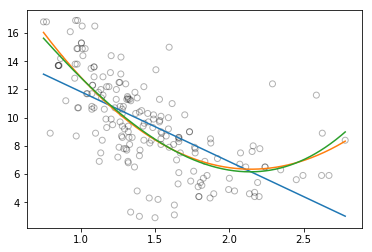

In [15]:
interpola (massa, accel, 3)

# Residual plot

In questo caso usando yellowbrick, su un modello di ridge regression.

In [16]:
# !pip3 install yellowbrick

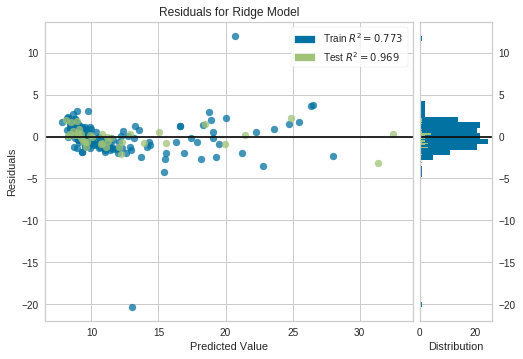

In [17]:
from sklearn.model_selection import train_test_split
# Identify the feature and target columns
feature_names = ["potenzacv", "mas"]
target_name = "acc"

# Separate the instance data from the target data
X = df[feature_names]
y = df[target_name]

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data



# Feature rank

/home/andrea/.local/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


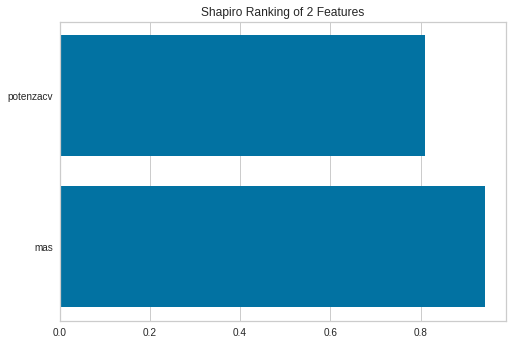

In [18]:
from yellowbrick.features import Rank1D

# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(features=features, algorithm='shapiro')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

# Covariance matrix tra feature

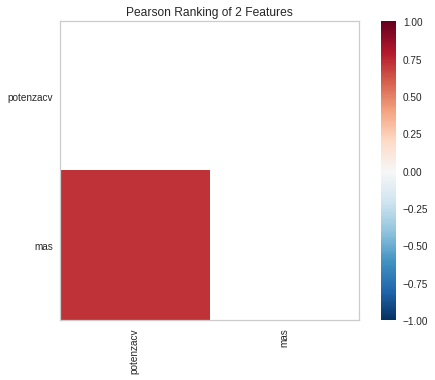

In [19]:
from yellowbrick.features import Rank2D

# Instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=features, algorithm='pearson')  #oppure algo="covariance"

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data


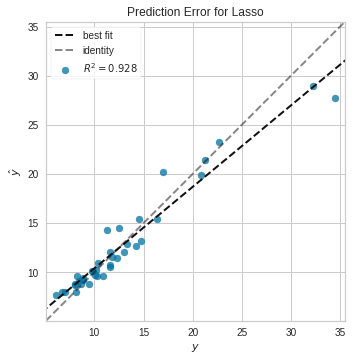

In [20]:
from sklearn.linear_model import Lasso

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
lasso = Lasso()
visualizer = PredictionError(lasso)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data
